___

<h1> Enunciado do Trabalho Prático (parte I) </h1>

___

<h2> Machine Learning </h2>
<h3> M. Sc. in Electrical and Computer Engineering </h3>
<h4> Instituto Superior de Engenharia / Universidade do Algarve </h4>

[MEEC](https://ise.ualg.pt/en/curso/1477) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

Notas:
1. Leia atentatamente os textos (em markdown) e os comentários (no código) e responda às questões colocadas.
2. O trabalho deve ser
    - realizado em grupos de 2 alunos.
    - entregue até às 23h59 do dia 01 de Novembro de 2023, via Moodle.
    - realizado em Python, usando Jupyter Notebooks.
3. Entregue:
    - em formato Jupyter Notebook (`.ipynb`), com o nome `TP1_<axxxxx>-<nome1>_<axxxxx>-<nome2>.ipynb`, em que `<axxxxx>-<nome1>` e `<axxxxx>-<nome2>` são os número de alunos e respetivos nomes.
    - com todos os outputs, gráficos visíveis, comentários, etc.
    - com o código a funcionar, i.e., deve ser possível executar todas as células do notebook sem erros, de forma sequencial.
3. No final haverá uma sessão de perguntas e respostas sobre o trabalho. Será atribuida classificação negativa trabalhos que:
    - sejam cópias uns dos outros (0 valores - sem possibilidade de melhoria)
    - não sejam realizados pelos alunos que os entregam (0 valores - sem possibilidade de melhoria)
    - não sejam entregues até à data limite (desconto de 0.5 valores por dia de atraso, limite 4 valores)
    - não sejam apresentados na sessão de perguntas e respostas (0 valores)

In [1]:
Notas:
1. Leia atentatamente os textos (em markdown) e os comentários (no código) e responda às questões colocadas.
2. O trabalho deve ser
    - realizado em grupos de 2 alunos.
    - entregue até às 23h59 do dia 01 de Novembro de 2023, via Moodle.
    - realizado em Python, usando Jupyter Notebooks.
3. Entregue:
    - em formato Jupyter Notebook (`.ipynb`), com o nome `TP1_<axxxxx>-<nome1>_<axxxxx>-<nome2>.ipynb`, em que `<axxxxx>-<nome1>` e `<axxxxx>-<nome2>` são os número de alunos e respetivos nomes.
    - com todos os outputs, gráficos visíveis, comentários, etc.
    - com o código a funcionar, i.e., deve ser possível executar todas as células do notebook sem erros, de forma sequencial.
3. No final haverá uma sessão de perguntas e respostas sobre o trabalho. Será atribuida classificação negativa trabalhos que:
    - sejam cópias uns dos outros (0 valores - sem possibilidade de melhoria)
    - não sejam realizados pelos alunos que os entregam (0 valores - sem possibilidade de melhoria)
    - não sejam entregues até à data limite (desconto de 0.5 valores por dia de atraso, limite 4 valores)
    - não sejam apresentados na sessão de perguntas e respostas (0 valores)

SyntaxError: invalid decimal literal (2566474042.py, line 5)

# Inicialização
Comecem por definir os vossos nomes nas variáveis `nome_1` e `nome_2` e a seguir executem a célula seguinte para definir a variável `nomes_dos_alunos` que será usada mais à frente. Se for só um aluno, deixe a variável `nome_2` vazia.

In [2]:
nome_1 = "Alexandre"
nome_2 = "Rodrigo"

In [3]:
nomes_dos_alunos = f"{nome_1} & {nome_2}"
f"Olá {nomes_dos_alunos}!"

'Olá Alexandre & Rodrigo!'

Corra a seguinte célula que irá carregar um conjunto de funções que serão usadas mais à frente. Se tiver curiosidade, pode abrir o ficheiro `utils.ipynb` e ver o código que está lá dentro.

In [4]:
%run utils.ipynb


O seguinte código serve para definir a semente do vosso trabalho.

In [5]:
seed = string_para_int_entre_0_e_b(nomes_dos_alunos, 10**6)
f"A vossa seed é {seed}"

'A vossa seed é 791664'

E agora usamos a seed calculada atrás para definirmos a semente do gerador de números aleatórios, para que os resultados sejam reproduzíveis.

In [6]:
import random
import numpy as np

random.seed(seed)
np.random.seed(seed)

## Classificação binária

Comecemos por criar um exemplo de resultado de classificação binária, com duas classes, 0 e 1. Imagine que tem emails e quer classificá-los em _spam_ (1) ou não _spam_ (0). Ou, quer fazer um teste que indica se uma pessoa tem ou não uma doença.

 Para isso, vamos criar uma lista de valores binários, `y`, que será o equivalente a ter os _targets_ ("valores reais") de uma classificação binária.

De seguida vamos criar duas listas com alguns valores "invertidos", `y_hat_1` e `y_hat_2`, que será o equivalente a ter as previsões de dois classificadores diferentes para esses mesmos _targets_. Isto é, `y_hat_1` e `y_hat_2` são as previsões de dois classificadores diferentes para os mesmos _targets_ `y` onde alguns valores estão "errados".

### _Target_: y

Criemos então a lista de valores binários, `y`, que será o equivalente a ter os _targets_ ("valores reais") de uma classificação binária.

O peso da classe 0 é 18%


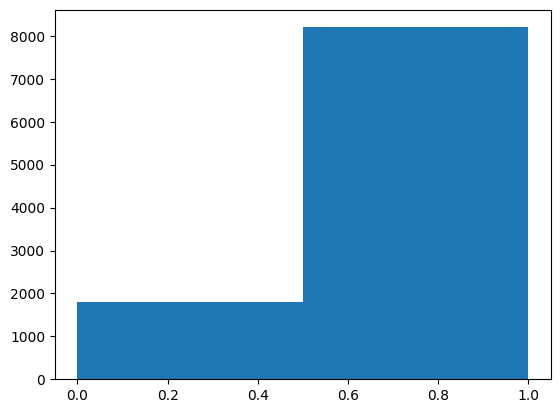

In [7]:
# Gerar uma listas de 1000 números inteiros aleatórios entre 0 e 1
from scipy.stats import skewnorm

# número de observações (comprimento da lista com o "target")
n = 10000

# gerar uma lista de números aleatórios entre 0 e 1 em que uma das classes tem mais peso
peso_da_classe_0 = random.randint(10,90)
print(f"O peso da classe 0 é {peso_da_classe_0}%")
y = np.array(random.choices([0, 1], weights=[peso_da_classe_0, 100-peso_da_classe_0], k=n))

# plot histogram
import matplotlib.pyplot as plt
_ = plt.hist(y, bins=2)

Por exemplo, os primeiros 10 valores de y são:

In [8]:
y[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

###  (Simulação de) previsões: y_hat_1 e y_hat_2
Na secção anterior definimos os valores de y, que são os _targets_ ("valores reais") de uma classificação binária.
P.e.:
- 0 significa que um email não é _spam_ e 1 significa que um email é _spam_
- 0 significa que um tumor é benigno e 1 significa que um tumor é maligno
- 0 significa que um cliente não vai comprar um produto e 1 significa que um cliente vai comprar um produto
- etc.

Definimos agora duas listas de valores, `y_hat_1` e `y_hat_2`, que será o equivalente a ter os _targets_ (`y`, "valores observados") e as previsões de dois classificadores diferentes para esses mesmos _targets_. Para isso, vamos usar uma função que inverte aleatoriamente "seed"% dos valores de y, em que invertido significa que 0 passa a 1 e 1 passa a 0.

## Definição da probabilidade de inversão dos valores de y (a menos de ruído)

Comecemos por definir a probabilidades de inversão dos valores de y (a menos de ruído).

In [9]:
prob = string_para_int_entre_0_e_b(nomes_dos_alunos, 10)
f"A probabilidade de inversão dos valores de y é {prob}% (a menos de ruído que será adicionado mais à frente)."

'A probabilidade de inversão dos valores de y é 4% (a menos de ruído que será adicionado mais à frente).'

### Calcula a inversão dos valores de y
A função `flip` recebe uma lista de valores binários (y) e inverte alguns desses valores, numa percentagem equivalente à probabilidade calculada anteriormente mais um ruído, i.e., a probabilidade de inversão (0->1 ou 1->0) é dada por:
$$ \text{probabilidade de inversão} = \text{prob} + \text{ruído} $$

In [10]:
def flip(y, prob, ruido_max=10):
    """
    Função que inverte aleatoriamente "prob+rand(0,ruido)"% dos valores de y,
    em que invertido significa que 0 passa a 1 e 1 passa a 0.
    :param y: lista de valores
    :param prob: probabilidade de inversão
    :param ruido_max: ruído máximo a adicionar à probabilidade de inversão
    :return: lista com os valores de y invertidos
    """
    # criar uma cópia de y para não alterar o original
    y = y.copy()

    # o ruido é um número aleatório entre 0 e ruido_max que é adicionado a prob
    ruido = np.random.randint(0, ruido_max)

    # gerar uma lista de índices aleatórios
    mask = np.random.randint(0, n, (prob+ruido) * n//100)

    # inverter os valores de y nos índices gerados
    y[mask] = 1 - y[mask]

    return y


Usando a função anterior, vamos criar duas listas de valores invertidos, `y_hat_1` e `y_hat_2`.

In [11]:
y_hat_1 = flip(y, prob=prob)

# os primeiros 10 valores de y_hat_1
y_hat_1[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [12]:
y_hat_2 = flip(y, prob=prob)

# os primeiros 10 valores de y_hat_2
y_hat_2[:10]

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

Temos então os dados, `y`, `y_hat_1` e `y_hat_2`, que será o equivalente a ter os _targets_ ("valores observados/reais") e as previsões de dois classificadores diferentes.

Vamos colocar esses dados numa _DataFrame_ do `Pandas` para facilitar uma primeira análise.

In [13]:
# concat y, y_hat_1 and y_hat_2 in a DataFrame
import pandas as pd
df = pd.DataFrame({
    'y': y,
    'y_hat_1': y_hat_1,
    'y_hat_1_correto': y == y_hat_1,
    'y_hat_2': y_hat_2,
    'y_hat_2_correto': y == y_hat_2,
})
df

y  y_hat_1  y_hat_1_correto  y_hat_2  y_hat_2_correto
0     1        1             True        1             True
1     1        1             True        1             True
2     1        1             True        0            False
3     0        0             True        0             True
4     1        1             True        1             True
...  ..      ...              ...      ...              ...
9995  1        1             True        1             True
9996  0        1            False        1            False
9997  1        1             True        1             True
9998  1        1             True        1             True
9999  1        1             True        1             True

[10000 rows x 5 columns]

Vamos na próxima secção analisar os resultados desses "classificadores" usando a matriz de confusão e as métricas de avaliação estudadas nas aulas teóricas.

# Questão 1: Matriz de confusão

Recorde que a matriz de confusão é dada por:
$$ \boxed{
\begin{matrix}
& \text{predição negativa} & \text{predição positiva} \\
\text{classe negativa} & TN & FP \\
\text{classe positiva} & FN & TP
\end{matrix}}
$$
em que
- TP: verdadeiros positivos
- FP: falsos positivos
- FN: falsos negativos
- TN: verdadeiros negativos
- TP + FP: número de predições positivas
- FN + TN: número de predições negativas
- TP + FN: número de valores reais positivos
- FP + TN: número de valores reais negativos
- TP + FP + FN + TN: número total de predições

Neste exercício pode usar a função [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) do sklearn.

Obs.: Em alguns livros e artigos, ou mesmo nos slides das aulas, a matriz de confusão é dada por:
$$ \boxed{
    \begin{matrix}
                                & \text{predição positiva}  & \text{predição negativa} \\
        \text{classe positiva}  & TP                        & FN \\
        \text{classe negativa}  & FP                        & TN
    \end{matrix}
    }
\text{ ou }
\boxed{
    \begin{matrix}
                                    & \text{classe positiva}    & \text{classe negativa} \\
        \text{predição positiva}    & TP                        & FP \\
        \text{predição negativa}    & FN                        & TN
    \end{matrix}
   }
$$

pelo que deve ter atenção à ordem das linhas e colunas da matriz de confusão.

## Questão 1.1: Calcule a matriz de confusão entre y e y_hat_1


In [14]:
from sklearn.metrics import confusion_matrix
matrix_confusao_1 = confusion_matrix(y, y_hat_1)
print(matrix_confusao_1)


[[1732   67]
 [ 325 7876]]


## Questão 1.2: Calcule a matriz de confusão entre y e y_hat_2

In [15]:
matrix_confusao_2 = confusion_matrix(y, y_hat_2)
print(matrix_confusao_2)

[[1662  137]
 [ 542 7659]]


## Questão 1.3: Que conclusões tirar a partir das matrizes de confusão?
Baseado nas matrizes de confusão, qual dos dois "classificadores" lhe parece melhor? Justifique.
Resposta: 
-Verdadeiros Positivos (TP): Na matriz de confusão 1, existem 7659 TP, e na matriz de confusão 2, 7876 TP. Isso representa o número de observações corretamente classificadas como positivas.

-Falsos Positivos (FP): Na matriz de confusão 1,existem 137 FP, e na matriz de confusão 2, 67 FP. Isso representa o número de observações incorretas classificadas como positivas.

-Verdadeiros Negativos (TN): Na matriz de confusão 1, existem 1662 TN, e na matriz de confusão 2, 1732 TN. Isso representa o número de observações corretamente classificadas como negativas.

-Falsos Negativos (FN): Na matriz de confusão 1, existem 542 FN, e na matriz de confusão 2, 325 FN. Isso representa o número de observações incorretas classificadas como negativas.

-Logo podemos dizer que a matriz de confusao 2 é melhor tendo mais TP e TN e menos FP e FN. Porem esta observação pode estar incorreta pois sem a accuracy, precisão, recall e f1 score não é possivel tirar conclusoes claras.


# Questão 2: Acurácia, precisão, _recall_ e $F_1-score$
## Questão 2.1: Código próprio

Calcule a acurácia, precisão, _recall_ e $F_1-score$ do classificador. **Não use funções definidas em bibliotecas**, mas sim as fórmulas, i.e., calcule os valores a partir da matriz de confusão.

Lembre-se que:
$$ \text{acurácia} = \frac{TP + TN}{TP + TN + FP + FN} $$
$$ \text{precisão} = \frac{TP}{TP + FP} $$
$$ \text{recall} = \frac{TP}{TP + FN} $$
$$ F_1 = 2 \frac{\text{precisão} \times \text{recall}}{\text{precisão} + \text{recall}} $$

In [31]:
def valores_da_matriz_de_confusao(mat):
    TP = mat[1, 1]
    TN = mat[0, 0]
    FP = mat[0, 1]
    FN = mat[1, 0]
    return TP, TN, FP, FN

TP_1, TN_1, FP_1, FN_1 = valores_da_matriz_de_confusao(matrix_confusao_1)
TP_2, TN_2, FP_2, FN_2 = valores_da_matriz_de_confusao(matrix_confusao_2)

Confirmacao que temos os valores da matriz de confusao original

In [32]:
ok_1 = [[TN_1, FP_1], [FN_1, TP_1]] == matrix_confusao_1
ok_2 = [[TN_2, FP_2], [FN_2, TP_2]] == matrix_confusao_2

print(f"Os valores da matriz de confusão 1 estão corretos? \n{ok_1}")
print(f"Os valores da matriz de confusão 2 estão corretos? \n{ok_2}")

Os valores da matriz de confusão 1 estão corretos? 
[[ True  True]
 [ True  True]]
Os valores da matriz de confusão 2 estão corretos? 
[[ True  True]
 [ True  True]]


In [33]:
def accuracy(TP, TN, FP, FN):
    a = (TP + TN)/(TP + TN + FP + FN)
    return a

In [34]:
def precision(TP, FP):
    p = TP / (TP + FP)
    return p

In [35]:
def recall(TP, FN):
    r = TP / (TP + FN)
    return r

In [36]:
def f1_score(p, r):
    f = 2 * (p * r) / (p + r)
    return f

    

In [37]:
f"A acurácia para o classificador 1 foi: {accuracy(TP_1, TN_1, FP_1, FN_1):.3f} e para o classificador 2 foi: {accuracy(TP_2, TN_2, FP_2, FN_2):.3f}"

'A acurácia para o classificador 1 foi: 0.961 e para o classificador 2 foi: 0.932'

In [38]:
f"A precisão para o classificador 1 foi: {precision(TP_1, FP_1):.3f} e para o classificador 2 foi: {precision(TP_2, FP_2):.3f}"

'A precisão para o classificador 1 foi: 0.992 e para o classificador 2 foi: 0.982'

In [39]:
f"O recall para o classificador 1 foi: {recall(TP_1, FN_1):.3f} e para o classificador 2 foi: {recall(TP_2, FN_2):.3f}"

'O recall para o classificador 1 foi: 0.960 e para o classificador 2 foi: 0.934'

In [40]:
f"O F1-score para o classificador 1 foi: {f1_score(precision(TP_1, FP_1), recall(TP_1, FN_1)):.3f} e para o classificador 2 foi: {f1_score(precision(TP_2, FP_2), recall(TP_2, FN_2)):.3f}"

'O F1-score para o classificador 1 foi: 0.976 e para o classificador 2 foi: 0.958'

## Questão 2.2: Usando o sklearn
Valide os seus código com as funções do sklearn, i.e., compare os resultados das suas funções com os resultados das funções do sklearn

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_1 = accuracy_score(y, y_hat_1)
precision_1 = precision_score(y, y_hat_1)
recall_1 = recall_score(y, y_hat_1)
f1_score_1 = f1_score(y, y_hat_1)
print("accuracy_1:")
print(accuracy_1)
print("precision_1:")
print(precision_1)
print("recall_1:")
print(recall_1)
print("f1_score_1:")
print(f1_score_1)

print("")
# Métricas para o classificador 2
accuracy_2 = accuracy_score(y, y_hat_2)
precision_2 = precision_score(y, y_hat_2)
recall_2 = recall_score(y, y_hat_2)
f1_score_2 = f1_score(y, y_hat_2)
print("accuracy_2:")
print(accuracy_2)
print("precision_2:")
print(precision_2)
print("recall_2:")
print(recall_2)
print("f1_score_2:")
print(f1_score_2)


accuracy_1:
0.9608
precision_1:
0.9915648999118721
recall_1:
0.9603706865016461
f1_score_1:
0.9757185332011893

accuracy_2:
0.9321
precision_2:
0.9824268855823499
recall_2:
0.9339104987196684
f1_score_2:
0.957554541476527


## Questão 2.3: Que conclusões tirar a partir dos valores de acurácia, precisão, _recall_ e $F_1-score$?
Baseado na acurácia, precisão, _recall_ e $F_1-score$, qual dos dois "classificadores" lhe parece melhor? Justifique.

Resposta:
Acurácia: O classificador 1 possui uma acurácia superior (0.961) em comparação com o classificador 2 (0.932). Isso significa que o classificador 1 classificou corretamente uma porcentagem maior do que o classificador 2.

Precisão: O classificador 1 também tem uma precisão superior (0.992) em comparação com o classificador 2 (0.982). Isso indica que, quando o classificador 1 faz uma previsão positiva, esta na maior parte do tempo é correta em relaçao ao classificador 2.

Recall: O classificador 1 possui um recall de 0.960, enquanto o classificador 2 tem um recall de 0.934. Isso diz que o classificador 1 é melhor em identificar eficazmente os exemplos positivos da classe em comparação com o classificador 2.

F1-score: O F1-score é uma métrica que combina precisão e recall. O classificador 1 tem um F1-score de 0.976, enquanto o classificador 2 tem um F1-score de 0.958. Isso indica que o classificador 1 é melhor em equilibrar tanto a precisão quanto o recall em comparação com o classificador 2.

Com base nestes metodos, o classificador 1 parece ser melhor do que o classificador 2. Ele tem um desempenho superior em termos de acurácia, precisão, recall e F1-score.

## Questão 2.4: Que conclusões tirar a partir dos valores de acurácia, precisão, _recall_ e $F_1-score$ supondo que os casos positivos (1) correspondem a emails _spam_?
Resposta:
Acurácia: A acurácia fornece uma medida geral de quão bem o classificador está esta a identificar os emails como "spam" ou "não spam". Uma alta acurácia indica que o classificador está a classificar corretamente a maioria dos emails. Mas, a acurácia pode ser um mau fator de analise quando se lida com conjuntos de dados desequilibrados, onde a maioria dos emails é "não spam". Logo, a acurácia nao é um bom metodo para verificar a eficiencia do classificador.

Precisão: A precisão é uma medida que nos diz o quanto um sistema acerta ao identificar corretamente os emails de spam. Se a precisão é alta, significa que o sistema comete poucos erros ao classificar emails como spam. Logo, é importante para garantir que os emails importantes não sejam acidentalmente considerados spam.

Recall: O recall avalia o quanto o sistema consegue encontrar a maioria dos emails de spam. Se o recall for alto, significa que o sistema não deixa muitos emails de spam passarem despercebidos. Logo, é importante para garantir que a maioria dos emails de spam seja detectada e classificada corretamente.

F1-score: O F1-score é uma métrica que combina precisão e recall e é útil quando é necessário equilibrar ambas. O F1-score é relevante quando há um compromisso entre evitar falsos positivos e garantir que a maioria dos casos positivos seja detectada.

Em um contexto de detecção de spam, os valores mais elevados de precisão e recall são os mais importantes, uma vez que temos de minimizar tanto os falsos positivos quanto os falsos negativos.

## Questão 2.5: Que conclusões tirar a partir dos valores de acurácia, precisão, _recall_ e $F_1-score$ supondo que os casos positivos (1) correspondem a casos de doença?
Resposta:
Acurácia: A acurácia fornece uma medida geral de quão bem o classificador esta em acertar as previsões sobre doenças. Se a acurácia for alta, significa que ele acerta na maioria dos casos, tanto quando a doença está presente quanto quando não está. No entanto, em situações em que a maioria das vezes a doença não está presente, a acurácia pode nos enganar e parecer mais alta do que realmente é.

Precisão: A precisão mede a proporção de casos classificados como positivos (doença presente) pelo classificador que são realmente positivos. Uma alta precisão indica que o classificador faz um bom trabalho em evitar falsos positivos, ou seja, casos incorretamente classificados como positivos quando na verdade são negativos.

Recall: O recall, neste contexto, mede a proporção de casos positivos (doença presente) que foram corretamente identificados pelo classificador. Um recall alto é importante para garantir que a maioria dos casos de doença seja detectada e classificada corretamente.

F1-score: O F1-score é uma métrica que combina precisão e recall e é útil quando é necessário equilibrar ambas. O F1-score é relevante quando há um compromisso entre evitar falsos positivos e garantir que a maioria dos casos de doença seja detectada.

Em um contexto de detecção de casos de doença, os valores mais elevados de precisão e recall são desejáveis, uma vez que desejamos minimizar tanto os falsos positivos quanto os falsos negativos.